In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('figure', facecolor='w')
from matplotlib import cm
from astropy.io import fits, ascii

In [11]:
test = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/test_results/safe_sample_final.csv.gz')
# test = pd.read_csv('/home/jess/Desktop/Research/Mdwarf_project/cannon_runs/apogee_test/safe_results.csv')

In [12]:
print(len(test))
test.keys()

10311


Index(['APOGEE_ID', 'GAIA_ID', 'RA', 'DEC', 'TEFF', 'FE_H', 'SPT', 'CHI',
       'CHI2', 'PLX', 'PLX_ERR', 'PMRA', 'PMRA_ERR', 'PMDEC', 'PMDEC_ERR',
       'VHELIO_AVG', 'L', 'B', 'X', 'Y', 'Z', 'v_x', 'v_y', 'v_z', 'J', 'H',
       'K', 'PHOT_G_MEAN_MAG', 'PHOT_BP_MEAN_MAG', 'PHOT_RP_MEAN_MAG', 'BP_RP',
       'G_ABS'],
      dtype='object')

In [3]:
test['APOGEE_ID']

0        2M00003379+7940362
1        2M00004701+1624101
2        2M00010146+6159427
3        2M00012151+5634379
4        2M00012252+1558339
5        2M00012694+1639052
6        2M00013219+0016012
7        2M00013817+0017293
8        2M00015592+0027057
9        2M00022557+0126203
10       2M00022873+7408165
11       2M00023747-0010572
12       2M00023809+1630383
13       2M00023816+1714249
14       2M00024286+1516102
15       2M00024474+6158060
16       2M00025988+0148410
17       2M00030375+7126304
18       2M00030930+0110025
19       2M00031459+7446493
20       2M00031777+1636147
21       2M00033020+0020078
22       2M00033371+0200331
23       2M00033817+0020226
24       2M00034394+8606422
25       2M00035534-0011465
26       2M00035968+1542051
27       2M00040854+0006145
28       2M00041959+7547098
29       2M00042083+0158446
                ...        
14798    2M23500929+0059274
14799    2M23501382-2027314
14800    2M23501612-1922466
14801    2M23502940-1940246
14802    2M23505474-

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


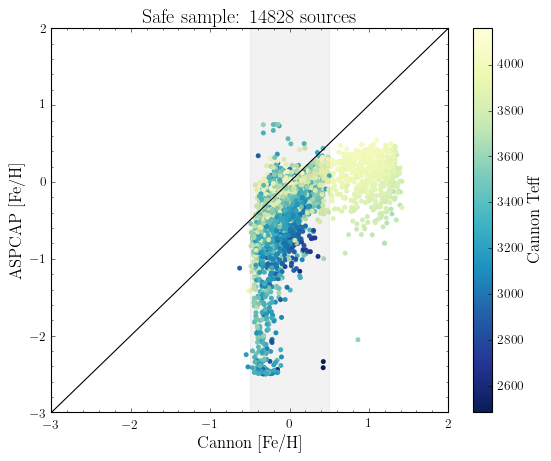

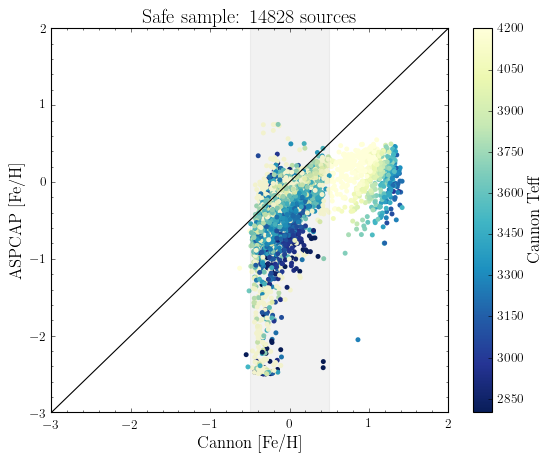

In [4]:
x = np.arange(-10,10,.5)
plt.scatter(test['FE_H'], test['M_H_APOGEE'], c=test['TEFF'], edgecolor='none', cmap='YlGnBu_r')
plt.axvspan(-.5, .5, alpha=.05, color='k')
plt.plot(x,x, color='k')
cb = plt.colorbar()
cb.set_label(r'Cannon Teff', fontsize=15)
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('ASPCAP [Fe/H]', fontsize=15)
plt.title(r'Safe sample: %s sources'%(len(test)), fontsize=18)
plt.xlim(-3,2)
plt.ylim(-3,2)
plt.minorticks_on()
plt.show()

x = np.arange(-10,10,.5)
plt.scatter(test['FE_H'], test['M_H_APOGEE'], c=np.clip(test['TEFF_APOGEE'],2800,4200), edgecolor='none', cmap='YlGnBu_r')
plt.axvspan(-.5, .5, alpha=.05, color='k')
plt.plot(x,x, color='k')
cb = plt.colorbar()
cb.set_label(r'Cannon Teff', fontsize=15)
plt.xlabel('Cannon [Fe/H]', fontsize=15)
plt.ylabel('ASPCAP [Fe/H]', fontsize=15)
plt.title(r'Safe sample: %s sources'%(len(test)), fontsize=18)
plt.xlim(-3,2)
plt.ylim(-3,2)
plt.minorticks_on()
plt.show()

/home/jess/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


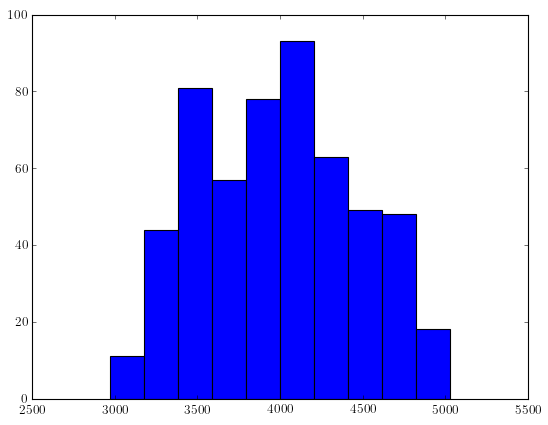

In [5]:
plt.hist(test[test['FE_H'] > 0.5][test['TEFF_APOGEE'] > 0]['TEFF_APOGEE'])
plt.show()

In [6]:
import astropy.coordinates as coord
import astropy.units as u

data = test
ra = coord.Angle(data['RA']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['DEC']*u.degree)

/home/jess/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


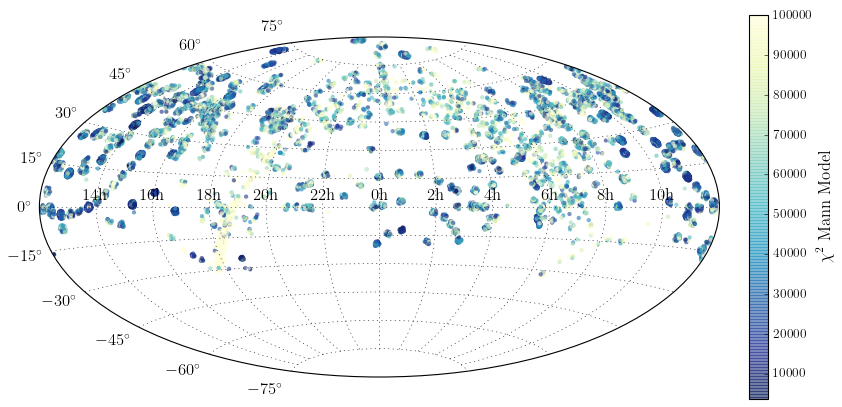

14828


In [37]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection="aitoff")
im = ax.scatter(ra.radian, dec.radian, edgecolor='none', c=np.clip(data['CHI_MANN'],0,100000), \
           s=15, alpha=.6, cmap='YlGnBu_r')
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(True)
cb = fig.colorbar(im, ax=ax, orientation='vertical',fraction=0.046, pad=0.04)
cb.set_label(r'$\chi^2$ Mann Model', fontsize=15)
plt.savefig('comments/figures/aitoff.png')
plt.show()

print(len(data))